In [100]:
import pandas as pd, tarfile
import matplotlib.pyplot as plt

In [37]:
with tarfile.open("../data/COMMERCIAL_LOAD_DATA_E_PLUS_OUTPUT.part1.tar.gz") as tf:
    example_file = tf.extractfile("USA_CA_Palmdale.AP.723820_TMY3/RefBldgWarehouseNew2004_7.1_5.0_3B_USA_CA_LOS_ANGELES.csv")
    df = pd.read_csv(example_file)

In [38]:
df.head(5)

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),Electricity:Facility [kW](Monthly),Gas:Facility [kW](Monthly)
0,01/01 01:00:00,16.895495,1.479671,0.0,0.0,5.481225,1.0116,42.210467,42.210467,NaN,NaN
1,01/01 02:00:00,16.696428,1.280603,0.0,0.0,5.481225,1.0116,36.503110,36.503110,NaN,NaN
2,01/01 03:00:00,17.220737,1.804913,0.0,0.0,5.481225,1.0116,51.598566,51.598566,NaN,NaN
3,01/01 04:00:00,16.837994,1.422169,0.0,0.0,5.481225,1.0116,40.554650,40.554650,NaN,NaN
4,01/01 05:00:00,17.380582,1.964757,0.0,0.0,5.481225,1.0116,56.244319,56.244319,NaN,NaN


In [45]:
# check whether there are cells where one of the last two columns is not NaN
(~df["Electricity:Facility [kW](Monthly)"].isna()).sum(), (~df["Gas:Facility [kW](Monthly)"].isna()).sum()

(0, 0)

We observe that the last two columns, `Electricity:Facility [kW](Monthly)` and `Gas:Facility [kW](Monthly)` are always not filled.

In [46]:
df.describe()

,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),Electricity:Facility [kW](Monthly),Gas:Facility [kW](Monthly)
count,8760.000000,8760.000000,8760.000000,8760.0,8760.000000,8760.000000,8760.000000,8760.000000,0.0,0.0
mean,28.011977,1.681238,1.287891,0.0,17.283503,3.311257,14.368482,14.368482,NaN,NaN
std,21.622597,1.508122,3.720721,0.0,18.266544,3.418924,23.398543,23.398543,NaN,NaN
min,6.492824,0.000000,0.000000,0.0,5.481225,1.011600,0.000000,0.000000,NaN,NaN
25%,15.415824,0.000000,0.000000,0.0,5.481225,1.011600,0.000000,0.000000,NaN,NaN
50%,16.680451,1.507980,0.000000,0.0,5.481225,1.011600,0.000000,0.000000,NaN,NaN
75%,49.935521,3.474151,0.000000,0.0,38.368572,8.092797,23.119045,23.119045,NaN,NaN
max,81.293148,3.474151,19.383579,0.0,49.331021,9.104397,131.775872,131.775872,NaN,NaN


<Axes: >

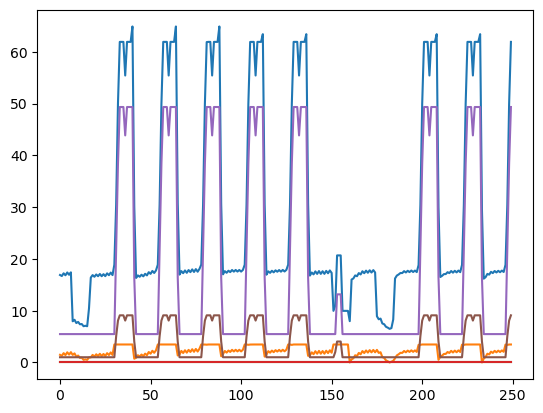

In [104]:
fig, ax = plt.subplots()
T = 250
df["Electricity:Facility [kW](Hourly)"][:T].plot.line(ax=ax)
df["Fans:Electricity [kW](Hourly)"][:T].plot.line(ax=ax)
df["Cooling:Electricity [kW](Hourly)"][:T].plot.line(ax=ax)
df["Heating:Electricity [kW](Hourly)"][:T].plot.line(ax=ax)
df["InteriorLights:Electricity [kW](Hourly)"][:T].plot.line(ax=ax)
df["InteriorEquipment:Electricity [kW](Hourly)"][:T].plot.line(ax=ax)